# Tweets Analysis

## Importing file and reading as a list

In [1]:
import pandas as pd
from collections import Counter
import re
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
df = pd.read_csv('tweets.csv', encoding = 'latin1')
df
tweet = df.values.tolist()
tweet

[['jeffmeier87',
  1452824609,
  '@Flunkie we have @etdragonpunch .  even more dank than trump'],
 ['IanofPortland',
  1452824609,
  'RT @TIMENOUT: #MakeAmericaGreatAgain with Donald Trump as President #Trump2016 https://t.co/JWvv9Oj5mr'],
 ['HRHHiramSNL',
  1452824609,
  "RT @President: Obama's Failings Among the Reasons for Trump's Rise. https://t.co/3XReso7cgp"],
 ['elizabe77648141',
  1452824609,
  'Rand Paul Supposes He Might Support Trump As Nominee After All {rssmicro} https://t.co/ohPsEs09Rf'],
 ['jmdonsi',
  1452824609,
  'RT @trendsinusa8: @jmdonsi 10 Reasons Why @realDonaldTrump  Would Make a Great President.  https://t.co/4OmTxFsqKP #MakeAmericaGreatAgain #\x89Û_'],
 ['OurLadyforLife',
  1452824609,
  'RT @realDonaldTrump: "@ameriflames: @realDonaldTrump @CLewandowski_ no one wants a Bush or a Clinton, they want a straight shooter like TRU\x89Û_'],
 ['LemusNury',
  1452824609,
  "RT @twaimz: 2016.   2 stick horses (one unicorn) 0 dates (people not the fruit) 1 bitch (me) 6 

## The 5 most active senders

In [2]:
lst2 = [item[0] for item in tweet]
Sender = Counter(lst2).most_common(5)
Sender

[('klansmen4trump', 90),
 ('facists4trump', 55),
 ('dawngpsalm63', 26),
 ('jessnatenuff', 24),
 ('skyjones55', 24)]

## The 10 most re-tweeted tweets

In [3]:
lst3 = [item[2] for item in tweet]
lst3
r = []
for x in lst3:
    if "RT" in x: 
        r.append(x)
RT = Counter(r).most_common(10)
RT

[('RT @zzzeeshaan: Alan Rickman died when he was 69, David Bowie died when he was 69, Donald Trump is currently 69, @ God https://t.co/5oCNCyC\x89Û_',
  1642),
 ("RT @twaimz: 2016.   2 stick horses (one unicorn) 0 dates (people not the fruit) 1 bitch (me) 6 something. i don't know 666 the devil donald\x89Û_",
  820),
 ('RT @deray: Donald Trump. 2016. https://t.co/xgteBpQ5KO', 548),
 ('RT @revivaIariana: David Bowie died at 69. Alan Rickman died at 69. Donald Trump is 69. https://t.co/SDdW4PtGSE',
  415),
 ("RT @NathanZed: I cut together Donald Trump's rally and the scene from The Interview when the little girl sings bout Kim Jong Un https://t.c\x89Û_",
  379),
 ('RT @leezachariah: Very sad to report that Donald Trump, 69, remains in good health.',
  357),
 ('RT @TheTweetOfGod: SPOT THE MISSING NUMBER  David Bowie (1947 - 2016) Alan Rickman (1946 - 2016) Donald Trump (1946 -      )',
  182),
 ('RT @mylastdilemma: David Bowie: 69 ans Alan Rickman: 69 ans Donald Trump: https://t.co/OwIwtD

## The 5 most cited screen-names

In [4]:
res = []
res1 = []
sname = []
for x in lst3:
    temp = x.split()
    
    for ele in temp:
        if (ele[0] == '@') and (len(ele) > 2):
            res.append(ele)
        elif (ele == "God"):
            res1.append(ele)
res
res1
aces = ["@" + r for r in res1]
for x in aces:
    res.append(x)       
screenname = Counter(res).most_common(5)
screenname

[('@God', 1704),
 ('@zzzeeshaan:', 1642),
 ('@twaimz:', 846),
 ('@realDonaldTrump', 725),
 ('@deray:', 653)]

## The 10 most popular hashtags words

In [5]:
res1 = []

for x in lst3:
    temp = x.split()

    for ele in temp:  
        if (ele[0] == '#') and (len(ele) > 2):
            res1.append(ele)       
Hashtag = Counter(res1).most_common(10)
Hashtag

[('#Trump', 411),
 ('#Trump2016', 362),
 ('#MakeAmericaGreatAgain', 161),
 ('#GOPDebate', 154),
 ('#RealDonaldTrump', 146),
 ('#tcot', 93),
 ('#TRUMP', 88),
 ('#trump', 82),
 ('#DonaldTrump', 59),
 ('#TCOT', 58)]

## Sorting data by timestamp 

In [6]:
for index, row in df.iterrows():
    time = int(row['timestamp'])
    time = datetime.fromtimestamp(time).isoformat()
df['timestamp'] = time
df.sort_values('timestamp')
df

,sender,timestamp,text
0,jeffmeier87,2016-01-14T22:25:35,@Flunkie we have @etdragonpunch . even more d...
1,IanofPortland,2016-01-14T22:25:35,RT @TIMENOUT: #MakeAmericaGreatAgain with Dona...
2,HRHHiramSNL,2016-01-14T22:25:35,RT @President: Obama's Failings Among the Reas...
3,elizabe77648141,2016-01-14T22:25:35,Rand Paul Supposes He Might Support Trump As N...
4,jmdonsi,2016-01-14T22:25:35,RT @trendsinusa8: @jmdonsi 10 Reasons Why @rea...
...,...,...,...
19995,LauraStevensWSJ,2016-01-14T22:25:35,RT @corybe: This little detail from the new NB...
19996,frLarousse2,2016-01-14T22:25:35,RT @AnnCoulter: J@s@sF-ingChr@st - even GOP re...
19997,domainfinditcom,2016-01-14T22:25:35,RT @businessinsider: 'BITTER BROMANCE BREAKUP'...
19998,AaronBvo,2016-01-14T22:25:35,RT @zzzeeshaan: Alan Rickman died when he was ...


## Dividing data into 5 subsets containing only tweets

In [7]:
Tweets = df['text']
df1, df2, df3, df4, df5 = Tweets[:4000], Tweets[4000:8000], Tweets[8000:12000], Tweets[12000:16000], Tweets[16000:20000]

## Creating wordcloud for each subset

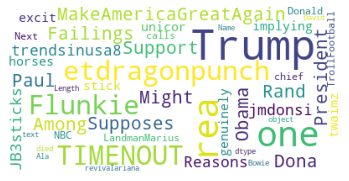

In [8]:
stop_words = ["https", "co", "RT", "even"] + list(STOPWORDS)
wordcloud = WordCloud(stopwords = stop_words, background_color = 'white', max_font_size = 50).generate(str(df1))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

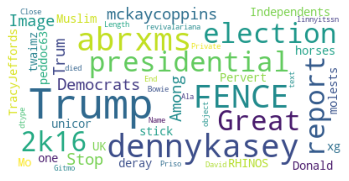

In [9]:
stop_words = ["https", "co", "RT", "even"] + list(STOPWORDS)
wordcloud = WordCloud(stopwords = stop_words, background_color = 'white', max_font_size = 50).generate(str(df2))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

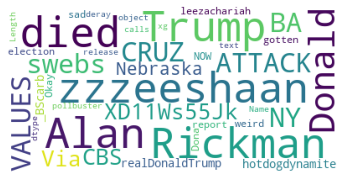

In [10]:
stop_words = ["https", "co", "RT", "even"] + list(STOPWORDS)
wordcloud = WordCloud(stopwords = stop_words, background_color = 'white', max_font_size = 50).generate(str(df3))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

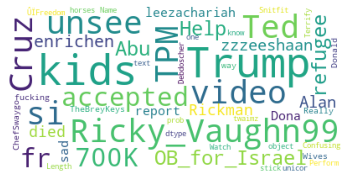

In [11]:
stop_words = ["https", "co", "RT", "even"] + list(STOPWORDS)
wordcloud = WordCloud(stopwords = stop_words, background_color = 'white', max_font_size = 50).generate(str(df4))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

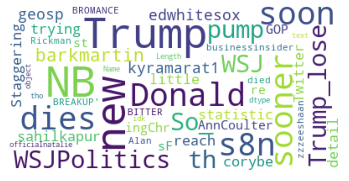

In [12]:
stop_words = ["https", "co", "RT", "even"] + list(STOPWORDS)
wordcloud = WordCloud(stopwords = stop_words, background_color = 'white', max_font_size = 50).generate(str(df5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()